## CPMSC 448 Homework 2
### Problem 4

#### Name:
#### PSU id:


In this problem will use the Pima Indians Diabetes dataset from the UCI repository to experiment with the $k$-NN algorithm and find the optimal value for the number of neighbors  $k$. You do not need to implement the algorithm and encouraged to use the implementation in \texttt{scikit-learn}.


### a) 
Download the provided `Pima.csv` data file and load it using `pandas`. As a sanity check, make sure  there are 768 rows of data (potential diabetes patients) and 9 columns (8 input features including  `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`, and 1 target output). Note that the data file has no header and you might want to explicitly create the header. The last value in each row contains the target label for that row, and the remaining values are the features. Report the statics of each feature (min, max, average) and the histogram of the labels (target outputs).
    

In [2]:
# Please note, I manually added the header in the file (hence no code about it below)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Pima.csv')
data.describe()

C:\Users\Varun\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028339B78488>]],
      dtype=object)

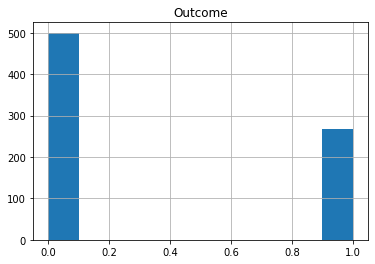

In [3]:
data.hist(column='Outcome')

### b) Split the data into training and test data with 80\% training and 20\% test data sizes. Use 5-fold cross-validation on training data to decide the best number of neighbours $k$. To this end, you can use the built in functionality in  `scikit-learn` such as `cross_val_score`. For $k=1,2,3,\ldots, 15$ compute the 5-fold cross validation error and plot the results  (with values of $k$ on the $x$-axis and accuracy on the $y$-axis). Include the plot in your report and justify your decision for picking a particular number of neighbors $k$

In [9]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics, datasets, linear_model
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# y is the target column here and X is the remaining columns except
# the target column (Outcome -> target column)
y = data.Outcome
X = data.drop('Outcome', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scores = []

# This for loop is to generate the value of k for each k from 1 to 16
# using nearest neighbor algorithm
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors = k)
    curr_score = cross_val_score(knn, X_train, y_train, cv=5)
    mean_val = curr_score.mean()
    scores.append(mean_val)

best_score = 1    

# This for loop is to find the value of k for which the score value is
# maximum out of all the other score values
for i in range(len(scores)):
    if scores[i] == max(scores):
        best_score += i
        
print(best_score)

11


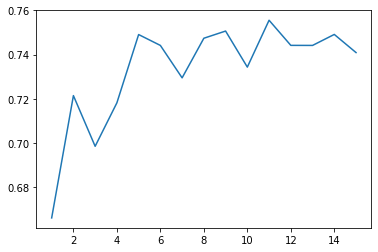

In [10]:
# This plots k value vs score value
x_axis = [i for i in range(1, 16)]
plt.plot(x_axis, scores)

### c ) Evaluate the $k$-NN algorithm on test data with the optimal number of neighbours you obtained in previous step and report the test error.

In [11]:
knn = KNeighborsClassifier(n_neighbors = best_score)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.7207792207792207

In [12]:
print("Test error: {:.3f}".format(1-knn.score(X_test, y_test)))

Test error: 0.279
